Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

/tmp/ipython-input-1530024309.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-1530024309.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

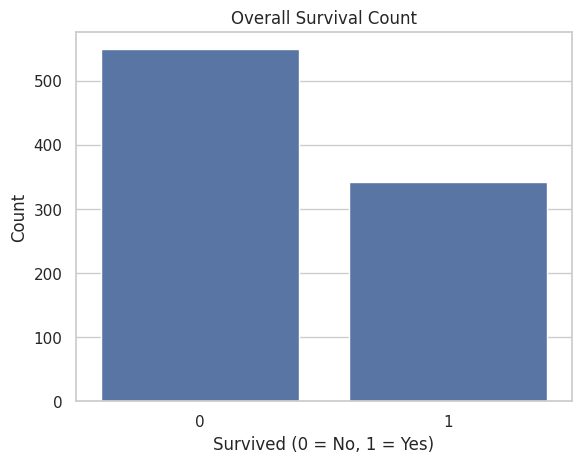

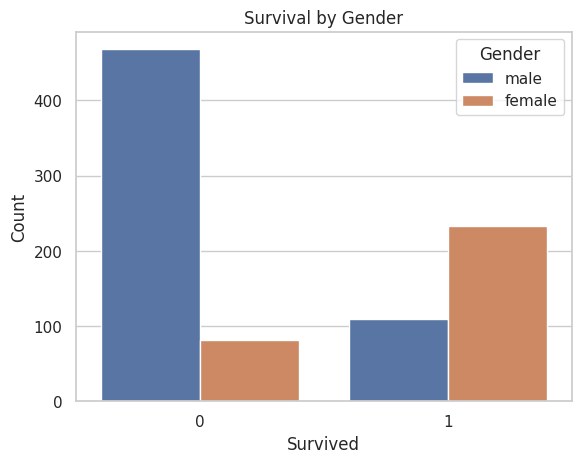

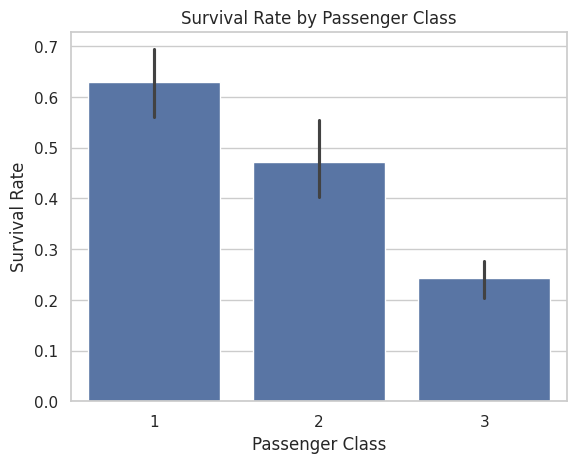

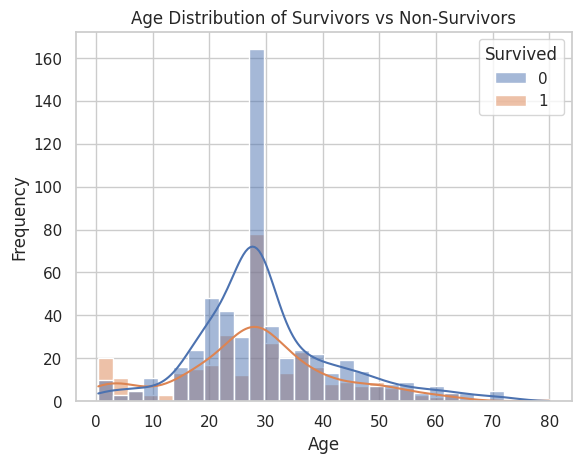

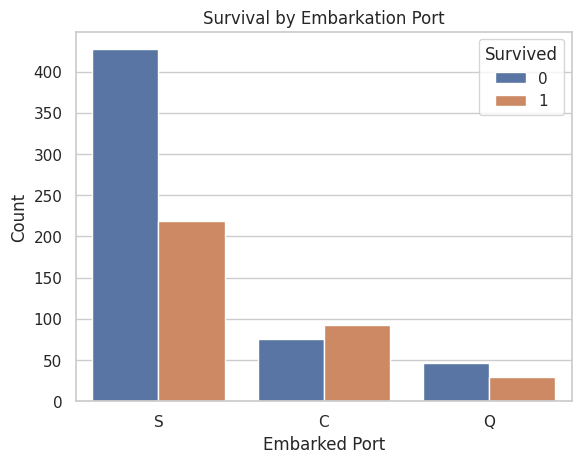

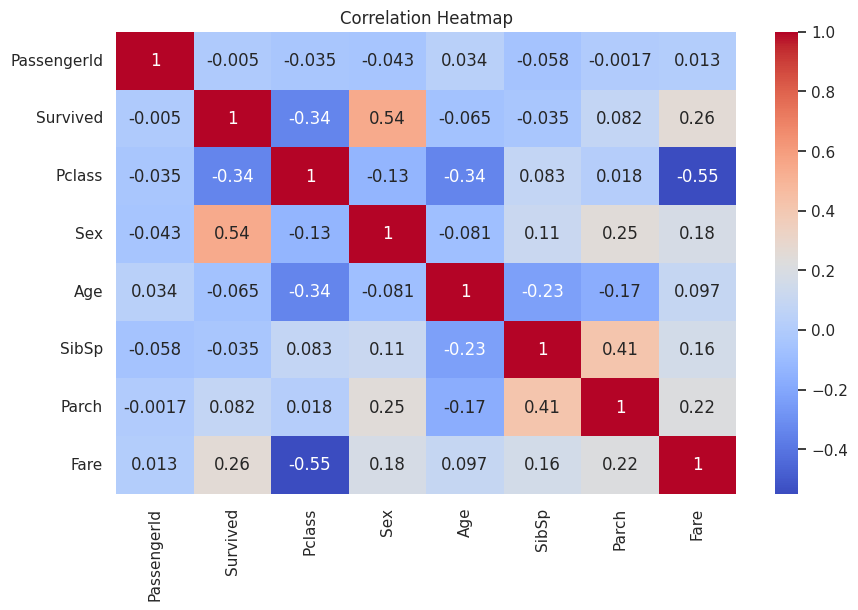


Key Insights:
1. Females had a significantly higher survival rate than males.
2. First-class passengers had better survival chances.
3. Age influenced survival, with children surviving more.
4. Passenger class and gender were strong predictors of survival.



In [ ]:
# ================================
# Task-02: Data Cleaning & EDA
# Dataset: Titanic (Kaggle)
# ================================

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 2. Load dataset
df = pd.read_csv("/content/train.csv")

# 3. Basic overview
print("Dataset Shape:", df.shape)
df.head()

# 4. Dataset information
df.info()

# 5. Statistical summary
df.describe()

# 6. Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# 7. Data Cleaning
# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Confirm cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# 8. Exploratory Data Analysis (EDA)

# 8.1 Overall Survival Count
plt.figure()
sns.countplot(x="Survived", data=df)
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 8.2 Survival by Gender
plt.figure()
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# 8.3 Survival Rate by Passenger Class
plt.figure()
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# 8.4 Age Distribution: Survivors vs Non-Survivors
plt.figure()
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 8.5 Survival by Embarkation Port
plt.figure()
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarkation Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.show()

# 9. Correlation Analysis (FIXED)

# Convert Sex to numeric (already done earlier)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 10. Key Insights
print("""
Key Insights:
1. Females had a significantly higher survival rate than males.
2. First-class passengers had better survival chances.
3. Age influenced survival, with children surviving more.
4. Passenger class and gender were strong predictors of survival.
""")
